<a href="https://colab.research.google.com/github/ankita1200/Machine-Learning-Topics/blob/main/K_MeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Algorithm -
1. Randomly initialize centroids.
2. Assign each instance to the a centroid it is closest to.
3. Re calculate the centroids
4. Repeat 2 and 3

In [2]:
def calc_distance(x1,x2):
  # calculates the euclidean distance
  return (np.sum((x1-x2)**2))**0.5

In [3]:
def find_closest_centroid(ic,X):
    assigned_centroids = []
    # X is a all the training instance. We loop through each training instance
    for i in X:
        # stores the distance of all training instance from the centroid
        distance = []
        for j in ic:
            distance.append(calc_distance(i,j))
        # assign the centroid index that is cl
        assigned_centroids.append(np.argmin(distance))
    return assigned_centroids

In [4]:
def calc_centroids(clusters, X):
    new_centroids = []
    # pd.concat - concatenates two dataframes.
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    for c in set(new_df["cluster"]):
        # selects the training instances tagged as cluster c.Excludes the cluster column
        current_cluster = new_df[new_df['cluster']==c][new_df.columns[:-1]]
        # calculates the mean
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

Use Numpy function random choice to randomly initialize centroids at the start.
The numpy random choice function selects a numpy array

In [5]:
def kmeans_clustering(X, k):
    centroids = X[np.random.choice(range(X.shape[0]),size=k,replace=False),:]
    for i in range(10):
        # calculates the class each data point belongs to
        get_centroids = find_closest_centroid(centroids, X)
        # re calculates the centroid against each data point
        centroids = calc_centroids(get_centroids, X)
    return centroids, get_centroids

In [6]:
# 100 samples of 2 dimensional data. The standard deviation of the normal distribution is 1 and mean is set to 5
x1 = np.random.normal(loc=5, scale=1, size=(100,2))
x2 = np.random.normal(loc=10, scale=2, size=(100,2))
x = np.concatenate([x1,x2], axis=0)
k = 3

In [18]:
# selecting random sample of rows from a numpy array
np.random.choice(range(20), size=5, replace=False)

array([ 3, 11, 19,  0,  6])

In [19]:
# selects 3rd,4th,5th indexed row
x2[[3,4,6],:]

array([[11.86721837,  9.41323744],
       [11.64266345,  7.0783512 ],
       [ 9.77665701,  7.50360922]])

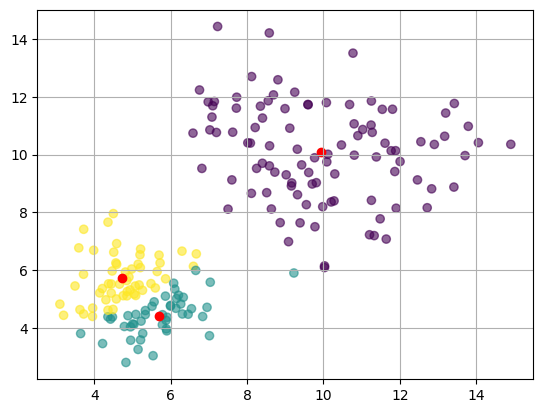

In [21]:
centroids, get_centroids = kmeans_clustering(x, k)
plt.scatter(x[:,0], x[:,1], alpha=0.6, c=get_centroids)
plt.scatter(np.array(centroids)[:,0], np.array(centroids)[:,1], c='red')
plt.grid(visible=True)
plt.show()

#plt.scatter(x[:,0],x[:,1], label="True Position")
#plt.show()


1. numpy random - to generate a nd array with random distribution of given shape. We use this to generate dummy data
2. numpy random choice - randomly selects data points from the given range
np.random.choice(range(20), size=5, replace=False)
This function returns a 1d array of size 5 with the elements chosen between 0-20 with no repetitions
3. numpy argmin - returns the index of the minimum element in the array
4. pandas concat - merges two pandas dataframes along the row/col axis
5. numpy indexing - X[[row_index1,row_index2],:]

